# Curve fit 
- numpy built in ```np.polyfit()```
- scipy also has some

## Least squares fitting
* Use ```np.polyfit(x, y, deg)```
    * x is one set of values
    * y is second set
    * deg is integer for order of desired polynomial
    * returns array of coefficients for $[x^n, x^{n-1},..., x^0]$

### Linear fit
- n = 1

### Power fit
- n > 1

### Exponential fit
- use ${x, log(y)}$
- $y = 

### Logarithmic fit
- use ${log(x), y}$


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
temp = np.array([20, 60, 100, 140, 180])
tempK = temp + 273.15
vol = np.array([26.82, 30.89, 34.32, 37.42, 40.34])

tempP = np.linspace(100, 1000, 99)
tempPk = np.array([i+273 for i in tempP])

dvdT_1 = np.polyfit(tempK, vol, 1) # polynomial 1st order
vol_1 = tempPk*dvdT_1 + dvdT_1[0]

dvdT_2 = np.polyfit(tempK, vol, 2)  # polynomial 2nd order
vol_2 = dvdT_1[2]*tempPk**2 + dvdT_1[1]*tempPk + dvdT_1[2]

dvdT_e = np.polyfit(tempK, np.log(vol), 1) # exponential
vol_e = np.exp(np.exp(dvdT_e[1] + tempPk*dvdT_e[0]))

dvdT_l = np.polyfit(np.log(tempK, vol), 1) # log
vol_l = dvdT_l[1] + dvdT_l[0]*np.log(tempPk)

[293.15 333.15 373.15 413.15 453.15]


ValueError: operands could not be broadcast together with shapes (99,) (2,) 

In [10]:
# data
temps = np.array([-9, -1, 7, 21, 32, 42, 50, 61])
tempsK = temps + 273
on_times = np.array([1150, 900, 800, 600, 500, 400, 350, 250])

# range to plot
full_temps = np.linspace(-40, 100, 99)  # 99 so there is no 0
full_tempsK = full_temps + 273

expfit = np.polyfit(tempsK, np.log(on_times), 1)  # exponential fit
exp_ontime = np.exp(full_tempsK*expfit[0]) * np.exp(expfit[1])

logfit = np.polyfit(np.log(tempsK), on_times, 1)  # log fit
log_ontime = logfit[0]*np.log(full_tempsK) + logfit[1]

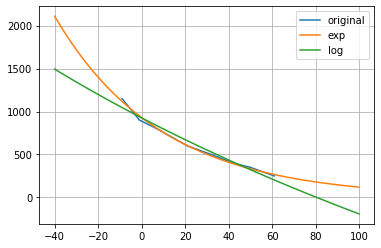

In [11]:
plt.plot(temps, on_times, label='original')
plt.plot(full_temps, exp_ontime, label='exp')
plt.plot(full_temps, log_ontime, label='log')
plt.legend()
plt.grid()
plt.show()

### Curve fitting

Goal is to turn discrete data into continuous function

**Lagrange interpolation:** simplest version of interpolation, connect points directly with weighting
**Bezier curve:** iterate with fewer control points


### Lagrange interpolation
* more points gives more factors/roots and a higher degree polynomial
    * more roots give more oscillations/ringing
    
* look up notebook if interested in step by step


### Bezier curves (Bernstein polynomials)

* 3 control points results in degree 2 polynomial